# ITMO ML Lab1. Kernel regression.

In [1]:
import pandas as pd

## Data preprocessing

In [2]:
penguins = pd.read_csv("../data/penguins.csv")

In [3]:
penguins

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [4]:
penguins = penguins.dropna()

In [5]:
penguins

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [6]:
penguins = penguins.reset_index().drop(columns=['index'])
penguins

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
328,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
329,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
330,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
331,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [7]:
y = penguins.species

In [8]:
penguins['fromTorgersen'] = pd.Series(penguins.island == 'Torgersen')
penguins['fromBiscoe'] = pd.Series(penguins.island == 'Biscoe')
penguins['fromDream'] = pd.Series(penguins.island == 'Dream')
penguins['sex'] = pd.Series(penguins.sex == 'FEMALE')
X = penguins.drop(columns=['species', 'island'])

In [9]:
y

0      Adelie
1      Adelie
2      Adelie
3      Adelie
4      Adelie
        ...  
328    Gentoo
329    Gentoo
330    Gentoo
331    Gentoo
332    Gentoo
Name: species, Length: 333, dtype: object

In [10]:
y = y.replace(to_replace=['Adelie', 'Chinstrap', 'Gentoo'], value=[1, 2, 3])

In [11]:
y

0      1
1      1
2      1
3      1
4      1
      ..
328    3
329    3
330    3
331    3
332    3
Name: species, Length: 333, dtype: int64

In [12]:
X

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,fromTorgersen,fromBiscoe,fromDream
0,39.1,18.7,181.0,3750.0,False,True,False,False
1,39.5,17.4,186.0,3800.0,True,True,False,False
2,40.3,18.0,195.0,3250.0,True,True,False,False
3,36.7,19.3,193.0,3450.0,True,True,False,False
4,39.3,20.6,190.0,3650.0,False,True,False,False
...,...,...,...,...,...,...,...,...
328,47.2,13.7,214.0,4925.0,True,False,True,False
329,46.8,14.3,215.0,4850.0,True,False,True,False
330,50.4,15.7,222.0,5750.0,False,False,True,False
331,45.2,14.8,212.0,5200.0,True,False,True,False


In [13]:
X.dtypes

culmen_length_mm     float64
culmen_depth_mm      float64
flipper_length_mm    float64
body_mass_g          float64
sex                     bool
fromTorgersen           bool
fromBiscoe              bool
fromDream               bool
dtype: object

In [14]:
X = X.astype({'sex': 'int32', 'fromTorgersen': 'int32', 'fromBiscoe': 'int32','fromDream': 'int32'})

## Normalizing

In [15]:
def minmax(data):
    value_min = min(data)
    value_max = max(data)
    return value_min, value_max


def normalize(series):
    data = list(series)
    v_min, v_max = minmax(data)
    delta = v_max - v_min
    for i in range(len(data)):
        data[i] = (data[i] - v_min) / delta
    return pd.Series(data)

In [16]:
X.culmen_length_mm = normalize(penguins.culmen_length_mm)
X.culmen_depth_mm = normalize(penguins.culmen_depth_mm)
X.flipper_length_mm = normalize(penguins.flipper_length_mm)
X.body_mass_g = normalize(penguins.body_mass_g)

In [17]:
X.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,fromTorgersen,fromBiscoe,fromDream
0,0.254545,0.666667,0.152542,0.291667,0,1,0,0
1,0.269091,0.511905,0.237288,0.305556,1,1,0,0
2,0.298182,0.583333,0.389831,0.152778,1,1,0,0
3,0.167273,0.738095,0.355932,0.208333,1,1,0,0
4,0.261818,0.892857,0.305085,0.263889,0,1,0,0


## Hyperparameter optimization

In [18]:
import sys
sys.path.append('../../../cf')
from uniform_split_A import uniform_split
from kernel_regression_C import KNNRegression, distance_names, kernel_names, window_names
from f1_score_B import compute_f1_score

In [36]:
def one_out_cv(X, y, class_recognizer, classes_count, params, target_count=1):
    y_test = []
    y_predicted = []
    for i in range(len(X)):
        X_copy = X.copy()
        y_copy = y.copy()
        x_test = X_copy.pop(i)
        y_test.append(class_recognizer(y_copy.pop(i)))
        classifier = KNNRegression(*params)
        classifier.fit(X_copy, y_copy)
        y_predicted.append(class_recognizer(classifier.predict(x_test, target_count)))
    return get_confusion_matrix(y_test, y_predicted, classes_count)

def get_confusion_matrix(y_test, y_predicted, classes_count):
    confusion_matrix = [[0 for _ in range(classes_count)] for _ in range(classes_count)]
    for test, pred in zip(y_test, y_predicted):
        confusion_matrix[test - 1][pred - 1] += 1
    return confusion_matrix

def hyperparameter_optimization(X, y, classes_count, class_recognizer, target_count=1, curr_window_names=window_names):
    best_f1_score = 0
    for distance_name in distance_names:
        for kernel_name in kernel_names:
            for window_name in curr_window_names:
                for h in range(1, 40, 2):
                    params = [distance_name, kernel_name, window_name, h]
                    confusion_matrix = one_out_cv(X, y, class_recognizer, classes_count, params, target_count)
                    f1_score = compute_f1_score(confusion_matrix, 'macro')
                    if best_f1_score < f1_score:
                        best_f1_score = f1_score
                        best_params = params
                        print("Finished with best params", best_params, f1_score)
    print('Overall best params:', best_params)
    print('Overall best macro f1-score:', best_f1_score)
    return best_params, best_f1_score

## Naive representation of target feature

In [20]:
y

0      1
1      1
2      1
3      1
4      1
      ..
328    3
329    3
330    3
331    3
332    3
Name: species, Length: 333, dtype: int64

In [21]:
X

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,fromTorgersen,fromBiscoe,fromDream
0,0.254545,0.666667,0.152542,0.291667,0,1,0,0
1,0.269091,0.511905,0.237288,0.305556,1,1,0,0
2,0.298182,0.583333,0.389831,0.152778,1,1,0,0
3,0.167273,0.738095,0.355932,0.208333,1,1,0,0
4,0.261818,0.892857,0.305085,0.263889,0,1,0,0
...,...,...,...,...,...,...,...,...
328,0.549091,0.071429,0.711864,0.618056,1,0,1,0
329,0.534545,0.142857,0.728814,0.597222,1,0,1,0
330,0.665455,0.309524,0.847458,0.847222,0,0,1,0
331,0.476364,0.202381,0.677966,0.694444,1,0,1,0


In [22]:
X = X.values.tolist()
y = list([i] for i in y)

In [23]:
import math

In [24]:
hyperparameter_optimization(X, y, 3, lambda x: round(x[0]))

Finished with best params ['manhattan', 'uniform', 'fixed', 1] 0.8825912919323902
Finished with best params ['manhattan', 'uniform', 'variable', 1] 0.9910241564808878
Finished with best params ['manhattan', 'uniform', 'variable', 3] 0.9940797866742973
Finished with best params ['manhattan', 'uniform', 'variable', 5] 0.9970187574133706
Overall best params: ['manhattan', 'uniform', 'variable', 5]
Overall best macro f1-score: 0.9970187574133706


(['manhattan', 'uniform', 'variable', 5], 0.9970187574133706)

## One-hot representation

In [25]:
import numpy as np

In [26]:
y = [i[0] for i in y]
y = pd.DataFrame({'target': y})
y

,target
0,1
1,1
2,1
3,1
4,1
...,...
328,3
329,3
330,3
331,3


In [27]:
y['target0'] = pd.Series(y.target == 1)
y['target1'] = pd.Series(y.target == 2)
y['target2'] = pd.Series(y.target == 3)
y = y.drop(columns = ['target'])
y = y.astype({'target0': 'int32', 'target1': 'int32', 'target2': 'int32'})

In [28]:
y = y.values.tolist()

In [29]:
hyperparameter_optimization(X, y, 3, lambda x: np.asarray(x).argmax() + 1, 3)

Finished with best params ['manhattan', 'uniform', 'fixed', 1] 0.887966445339081
Finished with best params ['manhattan', 'uniform', 'variable', 1] 0.9910241564808878
Finished with best params ['manhattan', 'uniform', 'variable', 3] 0.9940797866742973
Finished with best params ['manhattan', 'uniform', 'variable', 5] 0.9970187574133706
Finished with best params ['chebyshev', 'uniform', 'variable', 31] 1.0
Overall best params: ['chebyshev', 'uniform', 'variable', 31]
Overall best macro f1-score: 1.0


(['chebyshev', 'uniform', 'variable', 31], 1.0)

## Analyzing best model

In [30]:
import seaborn as sns

In [31]:
def plot(neighbours_count, f1_score, metrics_name):
    neighbours_count = pd.Series(neighbours_count)
    f1_score = pd.Series(f1_score)
    plot_data = pd.DataFrame({"neighbours_count": neighbours_count, metrics_name: f1_score})
    sns.lineplot(data=plot_data, x="neighbours_count", y=metrics_name)

### Variable window size

In [32]:
macro_f1_scores = []
micro_f1_scores = []
matrices = []
class_recognizer = lambda x: np.asarray(x).argmax() + 1
for h in range(1, 50):
    params = ['euclidean', 'uniform', 'variable', h]
    confusion_matrix = one_out_cv(X, y, class_recognizer, 3, params, 3)
    matrices.append(confusion_matrix)
    macro_f1_score = compute_f1_score(confusion_matrix, 'macro')
    macro_f1_scores.append(macro_f1_score)

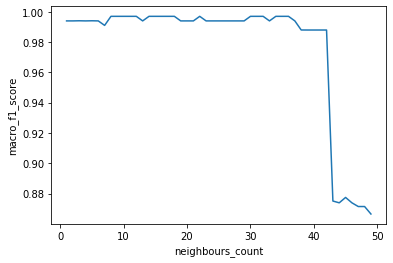

In [33]:
plot([h for h in range(1, 50)], macro_f1_scores, 'macro_f1_score')

### Fixed window size

In [37]:
hyperparameter_optimization(X, y, 3, lambda x: np.asarray(x).argmax() + 1, 3, curr_window_names=['fixed'])

Finished with best params ['manhattan', 'uniform', 'fixed', 1] 0.887966445339081
Finished with best params ['manhattan', 'triangular', 'fixed', 1] 0.9880958221582979
Overall best params: ['manhattan', 'triangular', 'fixed', 1]
Overall best macro f1-score: 0.9880958221582979


(['manhattan', 'triangular', 'fixed', 1], 0.9880958221582979)

In [38]:
macro_f1_scores = []
matrices = []
class_recognizer = lambda x: np.asarray(x).argmax() + 1
for h in range(1, 50):
    params = ['manhattan', 'triweight', 'fixed', h]
    confusion_matrix = one_out_cv(X, y, class_recognizer, 3, params, 3)
    matrices.append(confusion_matrix)
    macro_f1_score = compute_f1_score(confusion_matrix, 'macro')
    macro_f1_scores.append(macro_f1_score)

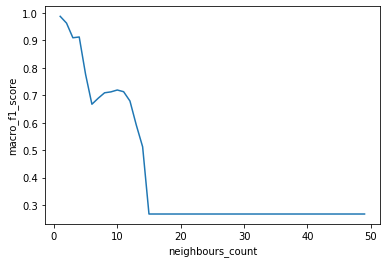

In [39]:
plot([h for h in range(1, 50)], macro_f1_scores, 'macro_f1_score')